In [1]:
import data_loader as dl

# указание пути к CSV-файлу
file_path = '/HW3/data/Mall_Customers.csv'

# загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

In [2]:
import sqlite3
import pandas as pd

# Подключаемся к базе данных (или создаем, если нет)
conn = sqlite3.connect("my_database.db")
cursor = conn.cursor()

# Проверяем, что это DataFrame
if not isinstance(df, pd.DataFrame):
    df = pd.DataFrame(df)

# Записываем данные в таблицу (если таблицы нет, создастся автоматически)
df.to_sql("customers", conn, if_exists="append", index=False)

print("Данные успешно добавлены.")

Данные успешно добавлены.


In [3]:
# Выбор клиентов, у которых ежегодный доход превышает 30k$.
cursor.execute('SELECT CustomerID, Genre, "Annual Income (k$)" FROM customers WHERE "Annual Income (k$)" > 30')
result = cursor.fetchall()
df = result
for row in result:
    print(row)

(33, 'Male', 33)
(34, 'Male', 33)
(35, 'Female', 33)
(36, 'Female', 33)
(37, 'Female', 34)
(38, 'Female', 34)
(39, 'Female', 37)
(40, 'Female', 37)
(41, 'Female', 38)
(42, 'Male', 38)
(43, 'Male', 39)
(44, 'Female', 39)
(45, 'Female', 39)
(46, 'Female', 39)
(47, 'Female', 40)
(48, 'Female', 40)
(49, 'Female', 40)
(50, 'Female', 40)
(51, 'Female', 42)
(52, 'Male', 42)
(53, 'Female', 43)
(54, 'Male', 43)
(55, 'Female', 43)
(56, 'Male', 43)
(57, 'Female', 44)
(58, 'Male', 44)
(59, 'Female', 46)
(60, 'Male', 46)
(61, 'Male', 46)
(62, 'Male', 46)
(63, 'Female', 47)
(64, 'Female', 47)
(65, 'Male', 48)
(66, 'Male', 48)
(67, 'Female', 48)
(68, 'Female', 48)
(69, 'Male', 48)
(70, 'Female', 48)
(71, 'Male', 49)
(72, 'Female', 49)
(73, 'Female', 50)
(74, 'Female', 50)
(75, 'Male', 54)
(76, 'Male', 54)
(77, 'Female', 54)
(78, 'Male', 54)
(79, 'Female', 54)
(80, 'Female', 54)
(81, 'Male', 54)
(82, 'Male', 54)
(83, 'Male', 54)
(84, 'Female', 54)
(85, 'Female', 54)
(86, 'Male', 54)
(87, 'Female', 57)

In [4]:
# Получаем названия столбцов
columns = [desc[0] for desc in cursor.description]

# Преобразуем в DataFrame
df = pd.DataFrame(result, columns=columns)

print(df.head())  # Проверяем результат

   CustomerID   Genre  Annual Income (k$)
0          33    Male                  33
1          34    Male                  33
2          35  Female                  33
3          36  Female                  33
4          37  Female                  34


/var/folders/91/pkfxltzd5fd66hd8w6yxgpb40000gn/T/ipykernel_43575/2090747220.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Genre"], y=df["Annual Income (k$)"], palette="coolwarm")


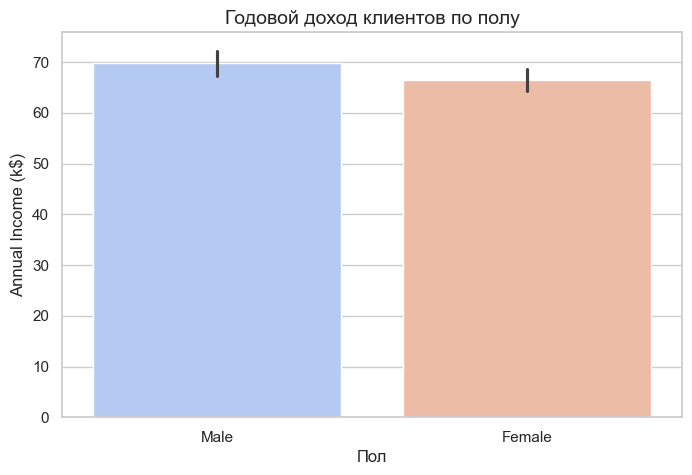

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем стиль
sns.set_theme(style="whitegrid")

# Создаем график
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Genre"], y=df["Annual Income (k$)"], palette="coolwarm")

# Добавляем заголовок
plt.title("Годовой доход клиентов по полу", fontsize=14)
plt.xlabel("Пол")
plt.ylabel("Annual Income (k$)")

# Показываем график
plt.show()


In [6]:
# Выбор клиентов по возрастанию дохода, у которых средняя оценка трат превышает значение 50.
cursor.execute('SELECT CustomerID, "Annual Income (k$)", "Spending Score (1-100)" FROM customers WHERE "Spending Score (1-100)" > 50 ORDER BY "Annual Income (k$)" ASC')
result = cursor.fetchall()
for row in result:
    print(row)

(2, 15, 81)
(2, 15, 81)
(2, 15, 81)
(2, 15, 81)
(4, 16, 77)
(4, 16, 77)
(4, 16, 77)
(4, 16, 77)
(6, 17, 76)
(6, 17, 76)
(6, 17, 76)
(6, 17, 76)
(8, 18, 94)
(8, 18, 94)
(8, 18, 94)
(8, 18, 94)
(10, 19, 72)
(12, 19, 99)
(10, 19, 72)
(12, 19, 99)
(10, 19, 72)
(12, 19, 99)
(10, 19, 72)
(12, 19, 99)
(14, 20, 77)
(16, 20, 79)
(14, 20, 77)
(16, 20, 79)
(14, 20, 77)
(16, 20, 79)
(14, 20, 77)
(16, 20, 79)
(18, 21, 66)
(18, 21, 66)
(18, 21, 66)
(18, 21, 66)
(20, 23, 98)
(20, 23, 98)
(20, 23, 98)
(20, 23, 98)
(22, 24, 73)
(22, 24, 73)
(22, 24, 73)
(22, 24, 73)
(24, 25, 73)
(24, 25, 73)
(24, 25, 73)
(24, 25, 73)
(26, 28, 82)
(28, 28, 61)
(26, 28, 82)
(28, 28, 61)
(26, 28, 82)
(28, 28, 61)
(26, 28, 82)
(28, 28, 61)
(30, 29, 87)
(30, 29, 87)
(30, 29, 87)
(30, 29, 87)
(32, 30, 73)
(32, 30, 73)
(32, 30, 73)
(32, 30, 73)
(34, 33, 92)
(36, 33, 81)
(34, 33, 92)
(36, 33, 81)
(34, 33, 92)
(36, 33, 81)
(34, 33, 92)
(36, 33, 81)
(38, 34, 73)
(38, 34, 73)
(38, 34, 73)
(38, 34, 73)
(40, 37, 75)
(40, 37, 75)
(4

In [7]:
# Получаем названия столбцов
columns = [desc[0] for desc in cursor.description]

# Преобразуем в DataFrame
df = pd.DataFrame(result, columns=columns)

print(df.head())  # Проверяем результат

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           2                  15                      81
1           2                  15                      81
2           2                  15                      81
3           2                  15                      81
4           4                  16                      77


График сохранен в plots/line_chart_Annual Income (k$)_vs_Spending Score (1-100).png


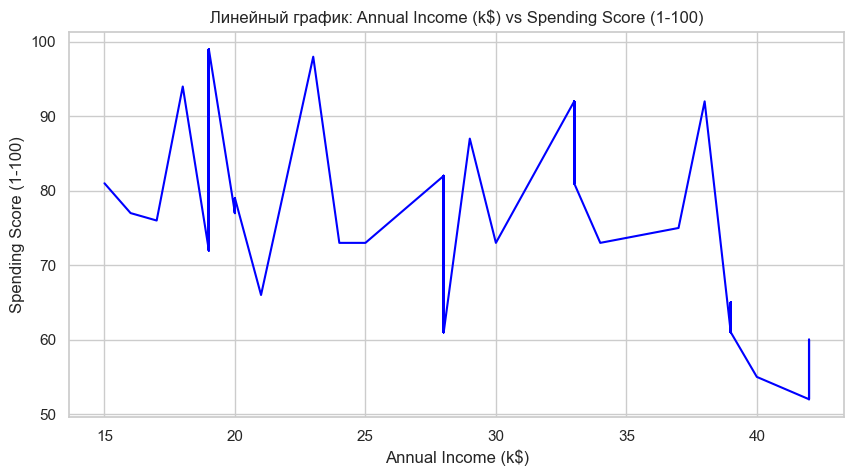

In [8]:
from HW3.data_visualizer import DataVisualizer

# Создаем объект визуализатора
visualizer = DataVisualizer(df)

# Строим линейный график с ограничением на 100 точек
visualizer.plot_line_chart(x_column='Annual Income (k$)', y_column='Spending Score (1-100)', color='blue', save=True, limit=100, markers=False)

In [9]:
# Общий доход всех клиентов.
cursor.execute('SELECT SUM("Annual Income (k$)") AS Total_Income FROM customers')
result = cursor.fetchall()
for row in result:
    print(row)

(48448,)


In [10]:
# Общий доход всех клиентов c гендерным разделением.
cursor.execute('SELECT SUM("Annual Income (k$)") AS Total_Income FROM customers GROUP BY Genre')
result = cursor.fetchall()
for row in result:
    print(row)

(26544,)
(21904,)


In [11]:
# Средний доход всех клиентов.
cursor.execute('SELECT AVG("Annual Income (k$)") AS Average_Income FROM customers')
result = cursor.fetchall()
for row in result:
    print(row)

(60.56,)


In [12]:
# Средний доход клиентов с высоким уровнем трат (>50).
cursor.execute('SELECT AVG("Annual Income (k$)") AS Average_Income FROM customers WHERE "Spending Score (1-100)" > 50')
result = cursor.fetchall()
for row in result:
    print(row)


(60.41237113402062,)


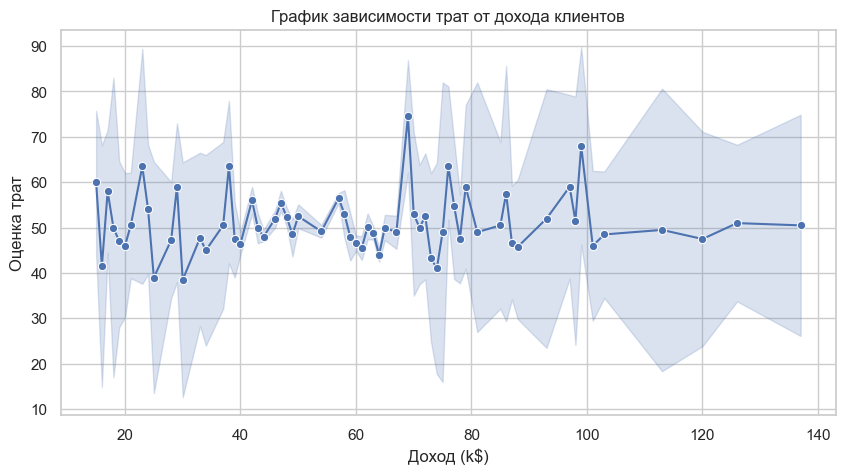

In [13]:
query = 'SELECT "Annual Income (k$)", "Spending Score (1-100)" FROM customers'
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], marker="o")

plt.title("График зависимости трат от дохода клиентов")
plt.ylabel("Оценка трат")
plt.xlabel("Доход (k$)")
plt.show()

In [14]:
conn.commit()
conn.close()